In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [4]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [5]:
# To predict the presence of cancer based on gene one and gene two expressions

In [6]:
# To use KNN classifier, let's choose the optimal value of k via an elbow plot

In [7]:
X, y = df.drop(columns='Cancer Present'), df['Cancer Present']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
def compute_error_rate(k):
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    return 1 - accuracy_score(y_test, pipe.predict(X_test))

Text(0, 0.5, 'Error Rate')

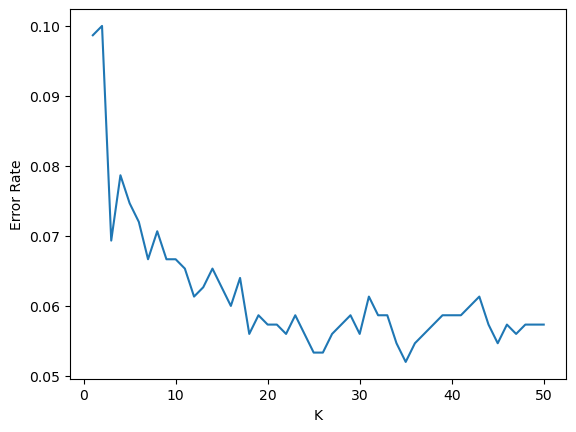

In [10]:
# k on a linear scale
ks_lin = np.arange(1, 51)
errors = np.vectorize(compute_error_rate)(ks_lin)
sns.lineplot(x=ks_lin, y=errors)
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

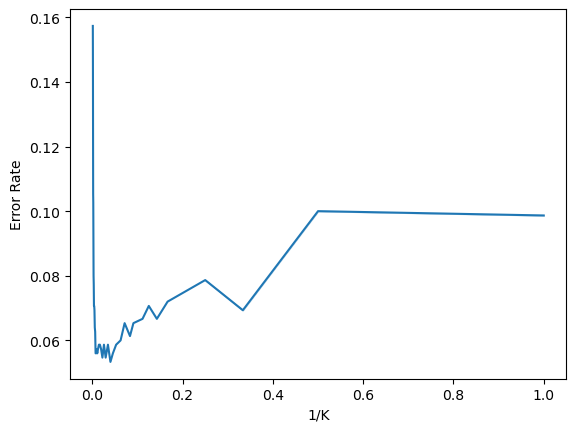

In [11]:
# k on a logarithmic scale
ks_log = np.logspace(0, 10, num=50, base=2.0).astype('int')
errors = np.vectorize(compute_error_rate)(ks_log)
sns.lineplot(x=(1 / ks_log), y=errors)
plt.xlabel('1/K')
plt.ylabel('Error Rate')